In [1]:
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
# Reading data

In [4]:
credit_fraud_df = pd.read_csv("./credit_fraud_detection/creditcard_2023.csv")
print(f"shape of the data: {credit_fraud_df.shape}")
credit_fraud_df.head(10)

shape of the data: (568630, 31)


,id,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-0.260648,-0.469648,2.496266,-0.083724,0.129681,0.732898,0.519014,-0.130006,0.727159,...,-0.110552,0.217606,-0.134794,0.165959,0.126280,-0.434824,-0.081230,-0.151045,17982.10,0
1,1,0.985100,-0.356045,0.558056,-0.429654,0.277140,0.428605,0.406466,-0.133118,0.347452,...,-0.194936,-0.605761,0.079469,-0.577395,0.190090,0.296503,-0.248052,-0.064512,6531.37,0
2,2,-0.260272,-0.949385,1.728538,-0.457986,0.074062,1.419481,0.743511,-0.095576,-0.261297,...,-0.005020,0.702906,0.945045,-1.154666,-0.605564,-0.312895,-0.300258,-0.244718,2513.54,0
3,3,-0.152152,-0.508959,1.746840,-1.090178,0.249486,1.143312,0.518269,-0.065130,-0.205698,...,-0.146927,-0.038212,-0.214048,-1.893131,1.003963,-0.515950,-0.165316,0.048424,5384.44,0
4,4,-0.206820,-0.165280,1.527053,-0.448293,0.106125,0.530549,0.658849,-0.212660,1.049921,...,-0.106984,0.729727,-0.161666,0.312561,-0.414116,1.071126,0.023712,0.419117,14278.97,0
5,5,0.025302,-0.140514,1.191138,-0.707979,0.430490,0.458973,0.611050,-0.092629,0.180811,...,-0.187739,-0.538518,-0.050465,-0.631553,-0.456480,0.252670,0.066681,0.095812,6901.49,0
6,6,1.016482,-0.397181,0.497868,-0.144463,0.331022,0.629243,0.431262,-0.134007,0.796159,...,-0.171137,-0.287017,-0.178197,-1.297597,1.182503,-0.604228,-0.198163,-0.087619,18954.45,0
7,7,-0.051306,-0.007194,1.139941,-0.877880,0.684668,0.714326,0.892615,-0.908409,0.901938,...,0.620676,-0.920426,0.034660,-1.091527,-0.742075,-0.104863,-1.382522,-2.748268,12298.23,0
8,8,-0.130680,-0.349547,0.425786,-0.760444,1.702777,2.324816,0.568968,0.049100,0.273118,...,-0.132787,-0.284700,-0.227779,2.248754,0.534846,-0.929738,-0.224385,0.243790,22052.90,0
9,9,0.058419,-0.093507,1.117270,-0.735172,0.466111,0.332371,0.683425,-0.136674,0.096409,...,-0.203634,-0.601581,-0.145082,-0.654783,-0.196621,0.226818,0.057119,0.100629,210.35,0


In [5]:
# check for nulls and remove id column

In [6]:
credit_fraud_df.drop(columns=["id"], inplace=True)
credit_fraud_df.isna().sum()

V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [7]:
# Checking for duplicates
credit_fraud_df[credit_fraud_df.duplicated()]

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
510531,-1.704517,2.599199,-1.205391,0.503527,-0.949674,3.226002,-2.323095,-6.027712,0.273389,-0.698893,...,8.08708,-6.450353,6.343132,-1.075048,0.349881,-0.240261,1.534445,2.154102,22549.29,1


In [8]:
df_full_train, df_test = train_test_split(credit_fraud_df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.Class.values
y_val = df_val.Class.values
y_test = df_test.Class.values

del df_train['Class']
del df_val['Class']
del df_test['Class']

In [9]:
# ROC AUC feature importance

In [10]:
from sklearn.metrics import roc_auc_score, roc_curve

In [11]:
for col in df_train:
    auc = roc_auc_score(y_train, df_train[col])
    if auc < 0.5:
        auc = roc_auc_score(y_train, -df_train[col])
    print('%16s, %.3f' % (col, auc))

              V1, 0.797
              V2, 0.866
              V3, 0.924
              V4, 0.950
              V5, 0.727
              V6, 0.775
              V7, 0.844
              V8, 0.671
              V9, 0.865
             V10, 0.935
             V11, 0.936
             V12, 0.950
             V13, 0.539
             V14, 0.968
             V15, 0.514
             V16, 0.857
             V17, 0.829
             V18, 0.760
             V19, 0.661
             V20, 0.670
             V21, 0.767
             V22, 0.510
             V23, 0.536
             V24, 0.578
             V25, 0.536
             V26, 0.545
             V27, 0.712
             V28, 0.654
          Amount, 0.502


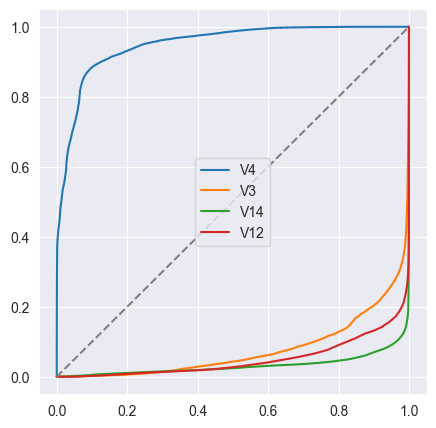

In [12]:
plt.figure(figsize=(5, 5))

fpr, tpr, _ = roc_curve(y_train, df_train.V4)
plt.plot(fpr, tpr, label='V4')

fpr, tpr, _ = roc_curve(y_train, df_train.V3)
plt.plot(fpr, tpr, label='V3')

fpr, tpr, _ = roc_curve(y_train, df_train.V14)
plt.plot(fpr, tpr, label='V14')

fpr, tpr, _ = roc_curve(y_train, df_train.V12)
plt.plot(fpr, tpr, label='V12')

plt.plot([0, 1], [0, 1], color='grey', linestyle='--')

plt.legend()
plt.show()

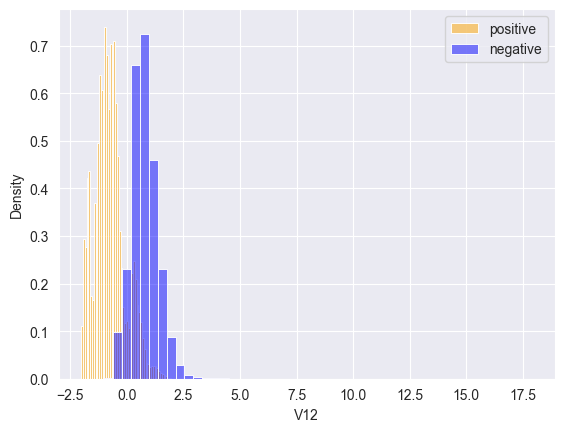

In [13]:
sns.histplot(df_train.V12[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.V12[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

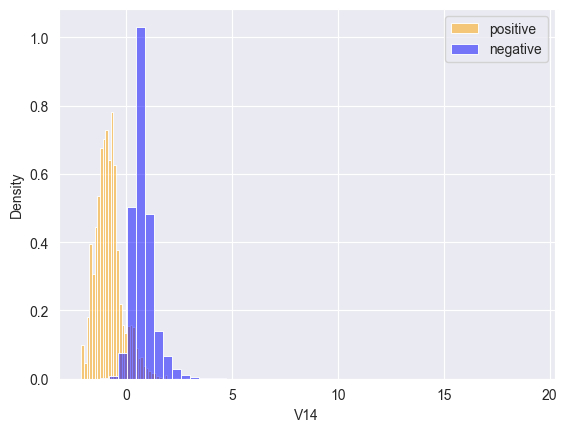

In [14]:
sns.histplot(df_train.V14[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.V14[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

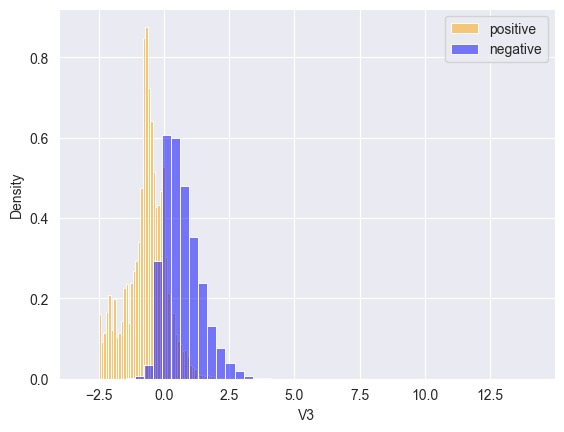

In [15]:
sns.histplot(df_train.V3[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.V3[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

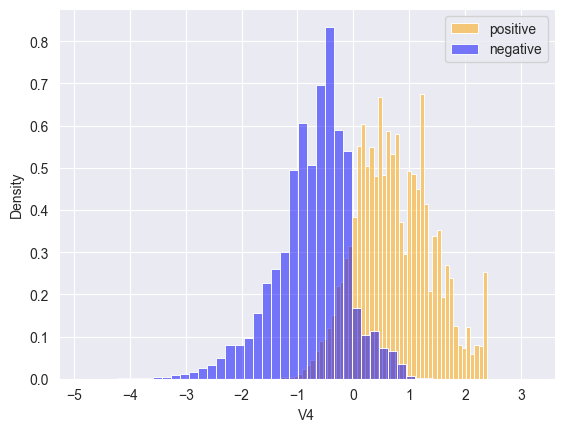

In [16]:
sns.histplot(df_train.V4[y_train == 1],
             stat='density', bins=50,
             color='orange', alpha=0.5,
             label='positive')
sns.histplot(df_train.V4[y_train == 0],
             stat='density', bins=50,
             color='blue', alpha=0.5,
             label='negative')

plt.legend()
plt.show()

In [17]:
# Training the model

In [18]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.linear_model import LogisticRegression

In [19]:
train_dicts = df_train.to_dict(orient='records')
dv = DictVectorizer()
X_train = dv.fit_transform(train_dicts)

model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
model.fit(X_train, y_train)

val_dicts = df_val.to_dict(orient='records')
X_val = dv.transform(val_dicts)

y_pred = model.predict_proba(X_val)[:, 1]

In [20]:
roc_auc_score(y_val, y_pred)

0.9935843274029322

In [21]:
# Precision and Recall calculation

In [22]:
def confusion_matrix_dataframe(y_val, y_pred):
    scores = []

    thresholds = np.linspace(0, 1, 101)

    for t in thresholds:
        actual_positive = (y_val == 1)
        actual_negative = (y_val == 0)

        predict_positive = (y_pred >= t)
        predict_negative = (y_pred < t)

        tp = (predict_positive & actual_positive).sum()
        tn = (predict_negative & actual_negative).sum()

        fp = (predict_positive & actual_negative).sum()
        fn = (predict_negative & actual_positive).sum()

        scores.append((t, tp, fp, fn, tn))

    columns = ['threshold', 'tp', 'fp', 'fn', 'tn']
    df_scores = pd.DataFrame(scores, columns=columns)

    return df_scores

In [23]:
df_scores = confusion_matrix_dataframe(y_val, y_pred)

In [24]:
df_scores[::10]


,threshold,tp,fp,fn,tn
0,0.0,57047,56679,0,0
10,0.1,56342,7200,705,49479
20,0.2,55774,3948,1273,52731
30,0.3,55309,2540,1738,54139
40,0.4,54852,1829,2195,54850
50,0.5,54308,1264,2739,55415
60,0.6,53787,846,3260,55833
70,0.7,53334,559,3713,56120
80,0.8,52833,360,4214,56319
90,0.9,51136,179,5911,56500


In [25]:
df_scores['p'] = df_scores.tp / (df_scores.tp + df_scores.fp)
df_scores['r'] = df_scores.tp / (df_scores.tp + df_scores.fn)

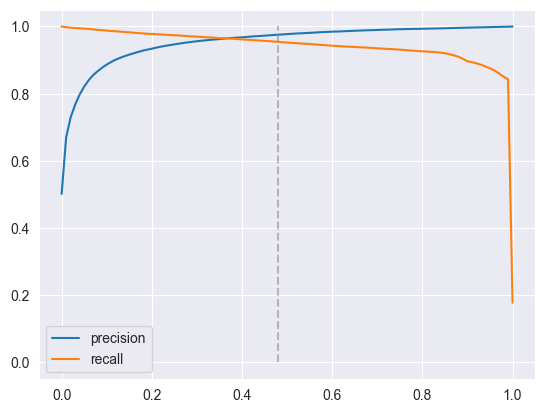

In [26]:
plt.plot(df_scores.threshold, df_scores.p, label='precision')
plt.plot(df_scores.threshold, df_scores.r, label='recall')

plt.vlines(0.48, 0, 1, color='grey', linestyle='--', alpha=0.5)

plt.legend()
plt.show()

In [27]:
df_scores

,threshold,tp,fp,fn,tn,p,r
0,0.00,57047,56679,0,0,0.501618,1.000000
1,0.01,56925,28072,122,28607,0.669730,0.997861
2,0.02,56841,21050,206,35629,0.729751,0.996389
3,0.03,56778,17220,269,39459,0.767291,0.995285
4,0.04,56733,14388,314,42291,0.797697,0.994496
...,...,...,...,...,...,...,...
96,0.96,49554,77,7493,56602,0.998449,0.868652
97,0.97,49069,61,7978,56618,0.998758,0.860150
98,0.98,48521,45,8526,56634,0.999073,0.850544
99,0.99,48071,29,8976,56650,0.999397,0.842656


In [28]:
# Getting F1 score

In [29]:
df_scores['f1'] = 2 * df_scores.p * df_scores.r / (df_scores.p + df_scores.r)

In [30]:
df_scores.loc[df_scores.f1.argmax()]

threshold        0.460000
tp           54560.000000
fp            1473.000000
fn            2487.000000
tn           55206.000000
p                0.973712
r                0.956404
f1               0.964981
Name: 46, dtype: float64

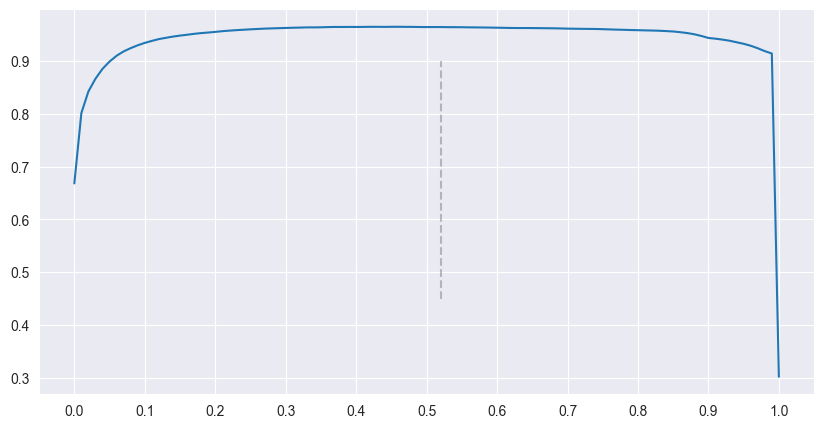

In [31]:
plt.figure(figsize=(10, 5))

plt.plot(df_scores.threshold, df_scores.f1)
plt.vlines(0.52, 0.45, 0.9, color='grey', linestyle='--', alpha=0.5)

plt.xticks(np.linspace(0, 1, 11))
plt.show()

In [32]:
df_scores # ideal threshold for p and r is 0.37, for f1 score t is 0.46

,threshold,tp,fp,fn,tn,p,r,f1
0,0.00,57047,56679,0,0,0.501618,1.000000,0.668103
1,0.01,56925,28072,122,28607,0.669730,0.997861,0.801512
2,0.02,56841,21050,206,35629,0.729751,0.996389,0.842476
3,0.03,56778,17220,269,39459,0.767291,0.995285,0.866542
4,0.04,56733,14388,314,42291,0.797697,0.994496,0.885291
...,...,...,...,...,...,...,...,...
96,0.96,49554,77,7493,56602,0.998449,0.868652,0.929039
97,0.97,49069,61,7978,56618,0.998758,0.860150,0.924287
98,0.98,48521,45,8526,56634,0.999073,0.850544,0.918845
99,0.99,48071,29,8976,56650,0.999397,0.842656,0.914358


In [33]:
# using 5-Fold CV

In [34]:
from sklearn.model_selection import KFold

In [35]:
columns = list(credit_fraud_df.columns)
columns.remove('Class')
columns

['V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount']

In [36]:
def train(fraud_train, fraud_y_train, c=1.0):
    dicts = fraud_train[columns].to_dict(orient='records')

    d_vectorized = DictVectorizer()
    fraud_x_train = d_vectorized.fit_transform(dicts)

    cur_model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    cur_model.fit(fraud_x_train, fraud_y_train)

    return d_vectorized, cur_model

def predict(df, vectorizer, trained_model):
    dicts = df[columns].to_dict(orient='records')

    x = vectorizer.transform(dicts)
    fraud_y_pred = trained_model.predict_proba(x)[:, 1]

    return fraud_y_pred

In [37]:
scores = []

k_fold = KFold(n_splits=5, shuffle=True, random_state=1)

for train_idx, val_idx in k_fold.split(df_full_train):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]

    y_train = df_train.Class.values
    y_val = df_val.Class.values

    dv, model = train(df_train, y_train, c=1.0)
    y_pred = predict(df_val, dv, model)

    auc = roc_auc_score(y_val, y_pred)
    scores.append(auc)

print('%.3f +- %.3f' % (np.mean(scores), np.std(scores)))

0.994 +- 0.000


In [38]:
# Hyperparemeter Tuning

In [39]:
k_fold = KFold(n_splits=5, shuffle=True, random_state=1)

for c in [0.01, 0.05, 0.1, 0.3, 0.5, 1, 3, 5, 10]:
    scores = []

    for train_idx, val_idx in k_fold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]

        y_train = df_train.Class.values
        y_val = df_val.Class.values

        dv, model = train(df_train, y_train, c=c)
        y_pred = predict(df_val, dv, model)

        auc = roc_auc_score(y_val, y_pred)
        scores.append(auc)

    print('C=%4s, %.3f +- %.3f' % (c, np.mean(scores), np.std(scores)))

C=0.01, 0.993 +- 0.000
C=0.05, 0.993 +- 0.000
C= 0.1, 0.994 +- 0.000
C= 0.3, 0.994 +- 0.000
C= 0.5, 0.994 +- 0.000
C=   1, 0.994 +- 0.000
C=   3, 0.994 +- 0.000
C=   5, 0.994 +- 0.000
C=  10, 0.994 +- 0.000


In [39]:
# Try for forests models

In [40]:
df_full_train, df_test = train_test_split(credit_fraud_df, test_size=0.2, random_state=7)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=7)

df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.Class.values
y_val = df_val.Class.values
y_test = df_test.Class.values

del df_train['Class']
del df_val['Class']
del df_test['Class']

In [41]:
train_dicts = df_train[columns].to_dict(orient='records')
val_dicts = df_val[columns].to_dict(orient='records')

In [42]:
dv = DictVectorizer(sparse=True)
X_train = dv.fit_transform(train_dicts)
X_val = dv.transform(val_dicts)

In [51]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(max_depth=10)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_val)


In [52]:
y_pred

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)

In [54]:
from sklearn.ensemble import RandomForestClassifier

rcf = RandomForestClassifier(max_depth=10, n_estimators=10)
rcf = rcf.fit(X_train,y_train)
rcf.predict(X_val)

array([0, 1, 0, ..., 0, 1, 0], dtype=int64)